# Тема: Курсовая работа

## Тема. Прогноз цен на недвижимость с использованием Scikit-learn



### Часть 1. Импортируем необходимые библиотеки

In [990]:
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.image as img
import matplotlib.pyplot as plt

import seaborn as sns
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6  # меняем размер графиков по умолчанию

### Часть 2. Загружаем исходные данные для работы

In [991]:
TRAIN_DATASET = 'train.csv'
TEST_DATASET = 'test.csv'

**Загрузка датасета**

Статистические данные о стоимости квартир по тестовой выборке.

* **ID** - идентификатор
* **District** - район
* **Rooms** - количество комнат
* **Square** - общая площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - этажность дома
* **HouseYear** - год постройки
* **Ecology_1** - экология 1
* **Ecology_2** - экология 2
* **Ecology_3** - экология 3
* **Social_1** - социальная среда 1
* **Social_2** - социальная среда 2
* **Social_3** - социальная среда 3
* **Healthcare_1** - здравоохранение 1
* **Healthcare_2** - здравоохранение 2
* **Shops_1** - магазины 1
* **Shops_2** - магазины 2
* **Price** - стоимость дома

In [992]:
df = pd.read_csv(TRAIN_DATASET)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [993]:
df.shape

(10000, 20)

In [994]:
df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

### Часть 3. Анализ и очистка данных для обучения из датасета

In [995]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


#### Выявляем и очищаем ключевые неточности в датасете:

- существуют квартиры с 0 комнат (значение min в выборке);
- минимальная площадь квартиры 1,13 м2;
- минимальная жилая площадь 0,37 м2;
- максимальная жилая площадь 7480 м2 превышает максимальную общую площадь 641м2;
- минимальная площадь кухни 0 м2;
- максимальная площадь кухни 2014 м2;
- минимальная этажность дома 0 этажей;
- из 10 тысяч значений жилая площадь определена только в 7887;
- из 10 тысяч значений 1-й показатель здравоохранения определен только в 5202 записях;


#### Обработка столбца Rooms (количество комнат)
Очищаем выбросы в поле Rooms, заменяя нулевое количество комнат в квартире на медианное значение

In [996]:
df[df['Rooms'] < 1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007


In [997]:
df.loc[df['Rooms'] == 0, 'Rooms'] = df['Rooms'].median()

In [998]:
df['Rooms'].value_counts()

2.0     3888
1.0     3705
3.0     2235
4.0      150
5.0       18
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [999]:
df['Rooms'] = df['Rooms'].astype(int)
df['Rooms'].dtype

dtype('int64')

#### Обработка столбцов Square (Площадь) и LifeSquare (Жилая площадь)
Находим в датафрейме ошибки, когда жилая площадь превышает общую площадь недвижимости и обмениваем такие значения местами.

In [1000]:
df[df['Square'] < df['LifeSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.198549
44,10521,38,3,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.452229
123,8753,25,3,85.952306,89.803753,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,NaN,1,11,B,309688.592681
153,9870,62,1,51.831473,53.491301,1.0,5,1.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,131797.472284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,41,30,2,59.015896,59.439082,12.0,5,5.0,2016,0.000078,B,B,22,6398,141,1046.0,3,23,B,126281.142781
9889,12918,23,2,51.440463,53.134243,51.0,3,17.0,2017,0.005767,B,B,1,388,0,NaN,0,0,B,88150.012510
9895,2737,27,3,123.430072,125.806981,123.0,5,10.0,2015,0.017647,B,B,2,469,0,NaN,0,0,B,234194.837047
9902,14001,73,1,44.098768,44.267551,1.0,7,24.0,2014,0.042032,B,B,37,6856,84,1940.0,2,5,B,381937.404161


In [1001]:
df['SquareAlternate']=df['Square']
df['LifeSquareAlternate']=df['LifeSquare']
df.loc[(df['LifeSquareAlternate'] >= df['SquareAlternate']), 'Square'] = df['LifeSquareAlternate']
df.loc[(df['LifeSquareAlternate'] >= df['SquareAlternate']), 'LifeSquare'] = df['SquareAlternate']
df.drop(['SquareAlternate', 'LifeSquareAlternate'], axis='columns', inplace=True)
df[df['Square'] < df['LifeSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


Очищаем выбросы в поле Square, удаляя из выборки все квартиры с площадью менее 10 м2. Так как цена на квартиру всегда сильно коррелирует с площадью квартиры, замена таких строк на медианное значение даст существенные отклонения в выборке.  Так как выборка у нас достаточно большая, а таких "нестандартных" квартир всего 9 (и их стоимость составляет свыше 100, а некоторых свыше 400 тысяч долларов), то лучшим решением будет вообще удалить их из выборки.

In [1002]:
df[df['Square'] < 10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1316,11526,27,1,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,107604.269441
1608,10202,6,1,4.604943,2.596351,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
3413,9487,5,1,5.549458,5.129222,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
4853,3224,27,2,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
4900,4504,27,3,5.610772,4.390331,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034
6392,14786,1,1,4.525736,1.136859,1.0,3,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,181434.825589
8283,15744,34,1,2.642219,1.988943,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B,458378.777006
9294,6782,45,1,5.257278,2.954309,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,438005.182323
9613,7657,38,1,4.618547,4.502784,1.0,28,1.0,1977,0.060753,B,B,15,2787,2,520.0,0,7,B,483283.488083


In [1003]:
df = df[df['Square'] > 10]
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,9991.000000,9991.000000,9991.000000,9991.000000,7878.000000,9991.00000,9991.000000,9991.000000,9.991000e+03,9991.000000,9991.000000,9991.000000,9991.000000,5199.000000,9991.000000,9991.000000,9991.000000
mean,8382.560805,50.425183,1.892603,57.271046,36.086693,6.27815,8.525773,12.615454,3.991972e+03,0.118868,24.696427,5353.955360,8.044840,1142.851702,1.319888,4.232409,214085.158786
std,4859.617947,43.597380,0.837782,77.327977,19.350829,28.57332,5.235582,6.770886,2.005905e+05,0.119049,17.531628,4006.415585,23.841775,1021.529381,1.493584,4.807114,92787.396280
min,0.000000,0.000000,1.000000,15.988889,0.370619,0.00000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4167.500000,20.000000,1.000000,41.882116,22.796821,1.00000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153889.327888
50%,8394.000000,36.000000,2.000000,52.666249,32.782779,6.00000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192277.326489
75%,12593.000000,75.000000,2.000000,66.009480,45.045424,9.00000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249105.358586
max,16798.000000,209.000000,19.000000,7480.592129,638.163193,2014.00000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Обратим внимание на квартиры явно превышающие нормальную жилую площадь (более 1000 м2). Так как такая квартира в выборке всего одна (площадью 7480 м2) при средней цене немногим более 200 тысяч долларов, то скорее всего данные в этой строке также искажены и мы их удалим

In [1004]:
df[df['Square'] > 1000]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4328,16550,27,3,7480.592129,81.694417,1.0,9,17.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B,217357.492366


In [1005]:
df = df[df['Square'] < 1000]
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,9990.000000,9990.000000,9990.000000,9990.000000,7877.000000,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9990.000000,9990.000000,9990.000000,5199.000000,9990.000000,9990.000000,9990.000000
mean,8381.743243,50.427528,1.892492,56.527971,36.080903,6.278679,8.525726,12.615015,3.992170e+03,0.118878,24.698699,5354.444344,8.045646,1142.851702,1.320020,4.232833,214084.831225
std,4859.174010,43.598932,0.837750,21.518005,19.345232,28.574702,5.235842,6.771083,2.006006e+05,0.119051,17.531035,4006.317960,23.842832,1021.529381,1.493601,4.807168,92792.034865
min,0.000000,0.000000,1.000000,15.988889,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4167.250000,20.000000,1.000000,41.881974,22.796166,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153887.002294
50%,8393.500000,36.000000,2.000000,52.665690,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12591.750000,75.000000,2.000000,66.007761,45.035978,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249109.948055
max,16798.000000,209.000000,19.000000,641.065193,638.163193,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Обращаем внимание, что в ряде столбцов, а именно LifeSquare и HealthCare_1, имеются пропущенные значения. Заполним их, используя метод, например, линейной интерполяции. 

In [1006]:
df = df.interpolate(method ='linear', limit_direction ='forward')
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9990.000000,9990.000000,9990.000000,9989.000000,9990.000000,9990.000000,9990.000000
mean,8381.743243,50.427528,1.892492,56.527971,36.099623,6.278679,8.525726,12.615015,3.992170e+03,0.118878,24.698699,5354.444344,8.045646,1140.352438,1.320020,4.232833,214084.831225
std,4859.174010,43.598932,0.837750,21.518005,18.481629,28.574702,5.235842,6.771083,2.006006e+05,0.119051,17.531035,4006.317960,23.842832,907.230052,1.493601,4.807168,92792.034865
min,0.000000,0.000000,1.000000,15.988889,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4167.250000,20.000000,1.000000,41.881974,23.656203,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,540.000000,0.000000,1.000000,153887.002294
50%,8393.500000,36.000000,2.000000,52.665690,32.952317,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,962.500000,1.000000,3.000000,192269.644879
75%,12591.750000,75.000000,2.000000,66.007761,44.462457,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249109.948055
max,16798.000000,209.000000,19.000000,641.065193,638.163193,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


В данных с описанием жилой площади основные вопросы вызывают значения, где жилая площадь менее 4м2 (что по субъективной оценке невозможно для проживания), а также данные где отношение жилой площади к общей менее 25%, что также вызывает подозрения в достоверности таких данных.

Заменим значения жилой площади меньше 4 м2 на среднестатистическое отношение жилой площади к общей в нашей выборке 36,1 м2 / 56,5 м2 = 63,9%


In [1007]:
df[df['LifeSquare'] < 4]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
26,4378,27,3,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,1660.333333,0,0,A,337299.867936
160,3522,6,1,66.419841,3.987101,1.0,2,1.0,1977,0.243205,B,B,5,1564,0,540.000000,0,0,B,193361.229815
363,15751,9,1,44.171793,1.251846,1.0,11,18.0,2017,0.161532,B,B,25,5648,1,30.000000,2,4,B,134910.715588
477,8849,45,1,63.419553,2.286357,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,676.666667,3,2,B,325600.765809
674,10631,88,1,42.571618,1.941521,1.0,6,1.0,1977,0.127376,B,B,43,8429,3,1698.333333,3,9,B,130374.241595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,15449,6,2,62.548496,3.645893,1.0,16,25.0,2017,0.243205,B,B,5,1564,0,540.000000,0,0,B,191217.348124
9396,3745,30,1,42.457169,3.259832,1.0,10,25.0,2014,0.000078,B,B,22,6398,141,1046.000000,3,23,B,155348.833619
9602,5112,6,2,63.591740,0.795539,10.0,17,17.0,2014,0.243205,B,B,5,1564,0,540.000000,0,0,B,174741.998061
9748,14053,27,2,56.564445,2.616535,1.0,7,12.0,2015,0.011654,B,B,4,915,0,129.500000,0,0,B,141086.005616


In [1008]:
df.loc[df['LifeSquare'] < 4, 'LifeSquare'] = df['Square']*0.63

In [1009]:
df[df['LifeSquare'] < 4]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


В нашей выборке остается достаточно большое количество данных, где соотношение жилой и общей площади весьма подозрительно. Однкао учитывая различные значения показателя жилой площади не будем вносить изменений в эти данные до опытов с обучением и тестированием.

In [1010]:
df[df['LifeSquare']/df['Square'] < 0.25]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
95,4280,34,2,61.334968,4.091945,1.0,26,1.0,2014,0.069753,B,B,53,13670,4,2408.500000,1,11,B,286564.441972
134,12613,6,2,65.496674,5.589324,1.0,5,17.0,1977,0.243205,B,B,5,1564,0,540.000000,0,0,B,180727.643541
158,16779,27,3,51.991064,4.896202,1.0,22,25.0,1977,0.072158,B,B,2,629,1,1969.333333,0,0,A,174687.566186
212,1748,88,2,67.628717,5.497061,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,2964.333333,3,9,B,412511.088764
270,15215,17,1,46.692974,5.941401,1.0,7,1.0,2015,0.000000,B,B,18,3374,5,620.000000,1,2,B,212290.684086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,2040,62,1,122.438148,5.751401,1.0,2,3.0,1977,0.072158,B,B,2,629,1,328.285714,0,0,A,224900.897679
9814,7560,1,3,77.891596,14.547078,1.0,8,17.0,1977,0.007122,B,B,1,264,0,398.857143,0,1,B,180713.830619
9828,13630,24,3,127.141143,4.811405,1.0,3,1.0,2017,0.111627,B,B,50,12238,8,1970.000000,2,3,B,611250.912034
9888,6053,6,1,41.314775,5.005477,1.0,9,17.0,2016,0.243205,B,B,5,1564,0,540.000000,0,0,B,159149.515475


#### Обработка столбца KitchenSquare (Площадь кухни)

Очищаем выбросы в поле KitchenSquare, заменяя площадь кухни менее 2 м2 на медианное значение

In [1011]:
df[df['KitchenSquare'] <= 2.0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2,4765,53,2,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.000000,1,3,B,220925.908524
7,11993,74,2,80.312926,31.078769,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,1067.200000,0,2,B,221244.156664
8,5172,1,2,64.511437,24.997161,1.0,9,17.0,1977,0.007122,B,B,1,264,0,1105.800000,0,1,B,229102.795999
12,6452,13,2,54.522805,31.759753,1.0,8,12.0,1999,0.090799,B,B,74,19083,2,1331.666667,5,15,B,229220.372609
14,10953,27,1,53.769097,52.408027,1.0,5,4.0,1977,0.072158,B,B,2,629,1,1853.000000,0,0,A,140647.565937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,16159,27,1,38.968338,44.166690,1.0,10,1.0,1977,0.211401,B,B,9,1892,0,619.750000,0,1,B,95529.569405
9986,2996,1,2,64.994245,40.699952,1.0,9,22.0,1977,0.007122,B,B,1,264,0,489.500000,0,1,B,200332.511658
9987,15623,23,2,55.620092,37.233215,0.0,2,4.0,1977,0.034656,B,B,0,168,0,359.250000,0,0,B,115797.553006
9994,4158,23,2,64.864198,39.687643,1.0,17,17.0,1977,0.075779,B,B,6,1437,3,746.750000,0,2,B,171323.515653


In [1012]:
df.loc[df['KitchenSquare'] <= 2, 'KitchenSquare'] = df['KitchenSquare'].median()

In [1013]:
df[df['KitchenSquare'] <= 3.0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1476,1775,101,1,23.583220,18.442768,3.0,3,5.0,1968,0.225825,A,B,41,6558,7,1548.0,3,2,B,108232.647619
2314,5798,59,3,109.698926,12.334332,3.0,16,22.0,1977,0.019509,B,B,37,7687,11,176.0,5,5,B,524279.240155
3084,3732,112,1,20.213128,13.800281,3.0,5,9.0,1974,0.069660,B,B,31,6119,4,540.0,1,2,B,113050.229914
3794,523,101,1,18.509177,15.170851,3.0,5,5.0,1970,0.225825,A,B,41,6558,7,1548.0,3,2,B,115845.861527
4118,828,90,1,20.924926,10.651455,3.0,7,5.0,1968,0.265089,B,B,37,5288,0,1937.0,3,2,B,128808.087357
4364,9905,41,1,22.691542,13.499648,3.0,7,9.0,1972,0.175055,B,B,36,10055,3,730.0,1,0,B,136682.956950
4650,10940,75,1,24.749737,16.531306,3.0,5,5.0,1975,0.307467,B,A,30,5048,9,325.0,2,5,B,86821.619523
5560,16680,23,3,67.133598,38.228749,3.0,2,16.0,2015,0.034656,B,B,0,168,0,1970.0,0,0,B,132755.210048
5667,4352,104,2,28.517666,15.565872,3.0,7,6.0,1931,0.000078,B,B,22,6398,141,1046.0,3,23,B,197245.267664
6155,7729,90,1,27.298757,15.250474,3.0,1,5.0,1967,0.265089,B,B,37,5288,0,1937.0,3,2,B,126918.470566


Проверим и приведем к жилой площади площадь кухонь, где эта площадь кухонь больше жилой площади

In [1014]:
df[df['LifeSquare'] < df['KitchenSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
95,4280,34,2,61.334968,4.091945,6.0,26,1.0,2014,0.069753,B,B,53,13670,4,2408.500000,1,11,B,286564.441972
134,12613,6,2,65.496674,5.589324,6.0,5,17.0,1977,0.243205,B,B,5,1564,0,540.000000,0,0,B,180727.643541
158,16779,27,3,51.991064,4.896202,6.0,22,25.0,1977,0.072158,B,B,2,629,1,1969.333333,0,0,A,174687.566186
212,1748,88,2,67.628717,5.497061,6.0,24,22.0,1977,0.127376,B,B,43,8429,3,2964.333333,3,9,B,412511.088764
227,16395,2,3,79.722243,44.731219,72.0,12,16.0,1987,0.130618,B,B,39,10418,9,900.000000,1,9,B,370148.625285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9576,7389,23,1,52.028804,4.295819,6.0,8,9.0,1977,0.014073,B,B,2,475,0,3865.600000,0,0,B,98638.755928
9813,2040,62,1,122.438148,5.751401,6.0,2,3.0,1977,0.072158,B,B,2,629,1,328.285714,0,0,A,224900.897679
9828,13630,24,3,127.141143,4.811405,6.0,3,1.0,2017,0.111627,B,B,50,12238,8,1970.000000,2,3,B,611250.912034
9888,6053,6,1,41.314775,5.005477,6.0,9,17.0,2016,0.243205,B,B,5,1564,0,540.000000,0,0,B,159149.515475


In [1015]:
df.loc[df['LifeSquare'] < df['KitchenSquare'], 'KitchenSquare'] = df['LifeSquare']

In [1016]:
df[df['KitchenSquare'] >= 80.0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2916,12390,72,3,99.323558,97.490674,96.0,22,25.0,2019,0.210473,B,B,11,2398,2,1994.0,3,0,B,445074.956552
2969,7441,62,3,114.734473,112.589083,112.0,3,3.0,2015,0.072158,B,B,2,629,1,457.4,0,0,A,315245.521059
4651,12552,58,3,116.405693,113.109653,112.0,3,3.0,2016,0.437885,B,B,23,5735,3,1084.0,0,5,B,296165.936689
9895,2737,27,3,125.806981,123.430072,123.0,5,10.0,2015,0.017647,B,B,2,469,0,240.0,0,0,B,234194.837047


#### Обработка столбца  Floor (Этаж) и HouseFloor (Этажность дома)

Заменяем этажность дома этажом проживания, если этажность дома ниже

In [1017]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9990.000000,9990.000000,9990.000000,9989.000000,9990.000000,9990.000000,9990.000000
mean,8381.743243,50.427528,1.892492,56.527971,36.498936,7.486764,8.525726,12.615015,3.992170e+03,0.118878,24.698699,5354.444344,8.045646,1140.352438,1.320020,4.232833,214084.831225
std,4859.174010,43.598932,0.837750,21.518005,18.163918,3.645250,5.235842,6.771083,2.006006e+05,0.119051,17.531035,4006.317960,23.842832,907.230052,1.493601,4.807168,92792.034865
min,0.000000,0.000000,1.000000,15.988889,4.003157,3.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4167.250000,20.000000,1.000000,41.881974,24.050979,6.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,540.000000,0.000000,1.000000,153887.002294
50%,8393.500000,36.000000,2.000000,52.665690,33.133876,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,962.500000,1.000000,3.000000,192269.644879
75%,12591.750000,75.000000,2.000000,66.007761,44.569631,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249109.948055
max,16798.000000,209.000000,19.000000,641.065193,638.163193,123.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [1018]:
df[df['HouseFloor'] < df['Floor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2,80.312926,31.078769,6.0,14,0.0,1977,0.075779,B,B,6,1437,3,1067.200000,0,2,B,221244.156664
14,10953,27,1,53.769097,52.408027,6.0,5,4.0,1977,0.072158,B,B,2,629,1,1853.000000,0,0,A,140647.565937
16,2119,27,2,49.360648,31.993964,5.0,6,5.0,1983,0.051815,B,B,5,1227,0,2002.000000,0,0,B,117000.381287
21,11935,27,2,64.711835,34.003594,6.0,15,1.0,1977,0.211401,B,B,9,1892,0,2119.666667,0,1,B,127200.026511
23,6641,54,3,118.907612,32.188728,6.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.000000,6,6,B,571069.052600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,2237,52,3,64.074977,47.633428,6.0,11,9.0,1983,0.371149,B,B,34,7065,1,750.000000,2,5,B,226434.880156
9985,16159,27,1,38.968338,44.166690,6.0,10,1.0,1977,0.211401,B,B,9,1892,0,619.750000,0,1,B,95529.569405
9989,4145,96,3,90.055233,47.860231,11.0,26,24.0,2005,0.041116,B,B,53,14892,4,214.500000,1,4,B,441108.911237
9991,11553,3,3,101.622794,51.628780,12.0,18,17.0,2000,0.265089,B,B,37,5288,0,1937.000000,3,2,B,212883.501504


In [1019]:
df.loc[df['HouseFloor'] < df['Floor'], 'HouseFloor'] = df['Floor']

In [1020]:
df[df['HouseFloor'] < df['Floor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [1021]:
df['HouseFloor'] = df['HouseFloor'].astype(int)
df['HouseFloor'].dtype

dtype('int64')

#### Обработка столбца  HouseYear (Год постройки дома)

Заменяем значения на медианные, там где значения выбиваются из диапазона 1800-2020

In [1022]:
df[df['HouseYear'] <= 1800]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [1023]:
df[df['HouseYear'] >= 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
585,15051,53,2,59.597891,44.869530,10.0,3,24,2020,0.049637,B,B,34,7759,0,229.000000,1,3,B,243114.222804
707,4345,62,1,49.275155,31.043348,6.0,5,5,2020,0.072158,B,B,2,629,1,1319.000000,0,0,A,135353.885620
790,6845,169,3,87.371123,64.905206,12.0,4,24,2020,0.178917,B,B,18,3594,4,192.000000,1,5,B,295304.011974
918,2530,53,2,64.233072,47.405440,13.0,13,24,2020,0.049637,B,B,34,7759,0,229.000000,1,3,B,283334.496716
1497,10814,109,1,37.265070,20.239714,9.0,9,12,20052011,0.136330,B,B,30,6141,10,262.000000,3,6,B,254084.534396
1499,6731,120,2,85.087643,77.976325,10.0,7,10,2020,0.341072,B,B,27,5664,48,2300.000000,3,11,B,536020.260344
2493,3445,53,1,35.672788,21.391266,8.0,4,24,2020,0.049637,B,B,34,7759,0,229.000000,1,3,B,170847.416766
2877,8832,1,3,83.260743,79.438325,6.0,15,21,2020,0.007122,B,B,1,264,0,30.000000,0,1,B,242243.090839
3357,9600,62,1,55.911215,43.821379,10.0,6,17,2020,0.072158,B,B,2,629,1,2336.000000,0,0,A,138770.715048
3485,7026,62,1,46.759316,44.019287,6.0,7,12,2020,0.072158,B,B,2,629,1,1990.571429,0,0,A,135588.215289


In [1024]:
df.loc[df['HouseYear'] >= 2020, 'HouseYear'] = df['HouseYear'].median()

In [1025]:
df['HouseYear'].value_counts()

1977.0    2666
2017.0     308
2016.0     303
2015.0     299
2014.0     209
          ... 
1914.0       1
1947.0       1
1910.0       1
1916.0       1
1928.0       1
Name: HouseYear, Length: 94, dtype: int64

#### Отработка оставшихся пустых значений в таблице

Анализируем в каких еще столбцах остались пустые значения (не все данные заполнены)

In [1026]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9989.000000,9990.000000,9990.000000,9990.000000
mean,8381.743243,50.427528,1.892492,56.527971,36.498936,7.486764,8.525726,13.435536,1984.778378,0.118878,24.698699,5354.444344,8.045646,1140.352438,1.320020,4.232833,214084.831225
std,4859.174010,43.598932,0.837750,21.518005,18.163918,3.645250,5.235842,6.088890,18.349559,0.119051,17.531035,4006.317960,23.842832,907.230052,1.493601,4.807168,92792.034865
min,0.000000,0.000000,1.000000,15.988889,4.003157,3.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4167.250000,20.000000,1.000000,41.881974,24.050979,6.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,540.000000,0.000000,1.000000,153887.002294
50%,8393.500000,36.000000,2.000000,52.665690,33.133876,6.000000,7.000000,14.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,962.500000,1.000000,3.000000,192269.644879
75%,12591.750000,75.000000,2.000000,66.007761,44.569631,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249109.948055
max,16798.000000,209.000000,19.000000,641.065193,638.163193,123.000000,42.000000,117.000000,2019.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Находим эту строку и заменяем значение Healthсare_1 на медианное значение этого показателя в данном районе 

In [1027]:
df[df['Healthcare_1'].isnull()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2,47.981561,29.442751,6.0,7,9,1969.0,0.08904,B,B,33,7976,5,NaN,0,11,B,184966.93073


In [1028]:
df[df['DistrictId']==35].median()

Id                 9434.000000
DistrictId           35.000000
Rooms                 2.000000
Square               47.637659
LifeSquare           29.651390
KitchenSquare         6.000000
Floor                 7.000000
HouseFloor           11.000000
HouseYear          1975.000000
Ecology_1             0.089040
Social_1             33.000000
Social_2           7976.000000
Social_3              5.000000
Healthcare_1        931.000000
Helthcare_2           0.000000
Shops_1              11.000000
Price            203602.408898
dtype: float64

In [1029]:
df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = 931

In [1030]:
df[df['DistrictId']==35]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2,47.981561,29.442751,6.0,7,9,1969.0,0.08904,B,B,33,7976,5,931.000000,0,11,B,184966.930730
412,4698,35,3,63.851403,47.245735,6.0,7,9,1971.0,0.08904,B,B,33,7976,5,1785.000000,0,11,B,242403.715876
556,8610,35,1,47.410775,23.036191,6.0,4,4,1977.0,0.08904,B,B,33,7976,5,931.000000,0,11,B,218138.095955
2764,8401,35,2,43.325817,22.487877,6.0,7,14,1969.0,0.08904,B,B,33,7976,5,477.600000,0,11,B,194175.395111
3097,12932,35,1,46.287195,35.064219,6.0,13,13,2015.0,0.08904,B,B,33,7976,5,937.666667,0,11,B,195895.983219
4108,14308,35,2,48.249779,29.473633,6.0,3,9,1971.0,0.08904,B,B,33,7976,5,2126.250000,0,11,B,181020.120527
4269,9603,35,1,34.182426,18.185922,5.0,7,9,1977.0,0.08904,B,B,33,7976,5,696.666667,0,11,B,143805.157012
4799,9265,35,1,35.868954,19.586919,9.0,16,16,1984.0,0.08904,B,B,33,7976,5,1498.000000,0,11,B,185193.840377
5645,13105,35,1,42.348253,39.462015,6.0,9,16,2015.0,0.08904,B,B,33,7976,5,1627.500000,0,11,B,209235.737420
6147,15404,35,4,101.392298,66.600047,10.0,17,22,1998.0,0.08904,B,B,33,7976,5,513.500000,0,11,B,559215.446005


In [1031]:
df.rename({'Helthcare_2': 'Healthcare_2'}, axis=1, inplace=True)

#### Работа с нецифровыми значениями

Выявляем все нецифровые элементы в датасете:

In [1032]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B


Определяем все существующие значения столбца Ecology_2.
Так как признак бинарный и имеет значение либо А, либо В,
заменяем А на 0, а В на 1 во всей таблице.

In [1033]:
df['Ecology_2'].value_counts()

B    9893
A      97
Name: Ecology_2, dtype: int64

In [1034]:
df.loc[df['Ecology_2'] == 'A', 'Ecology_4'] = 0
df.loc[df['Ecology_2'] == 'B', 'Ecology_4'] = 1
df.drop(['Ecology_2'], axis='columns', inplace=True)
df.rename({'Ecology_4': 'Ecology_2'}, axis=1, inplace=True)
df['Ecology_2'].value_counts()


1.0    9893
0.0      97
Name: Ecology_2, dtype: int64

Определяем все существующие значения столбца Ecology_3.
Так как признак бинарный и имеет значение либо А, либо В,
заменяем А на 0, а В на 1 во всей таблице.

In [1035]:
df['Ecology_3'].value_counts()

B    9715
A     275
Name: Ecology_3, dtype: int64

In [1036]:
df.loc[df['Ecology_3'] == 'A', 'Ecology_5'] = 0
df.loc[df['Ecology_3'] == 'B', 'Ecology_5'] = 1
df.drop(['Ecology_3'], axis='columns', inplace=True)
df.rename({'Ecology_5': 'Ecology_3'}, axis=1, inplace=True)
df['Ecology_3'].value_counts()

1.0    9715
0.0     275
Name: Ecology_3, dtype: int64

Данные из Shops_2 удаляем, так как в тестовой выборке эти данные отсутствуют

In [1037]:
df.drop(['Shops_2'], axis='columns', inplace=True)

#### Финальный анализ и сохранение нормализованных данных в файле

In [1038]:
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Price,Ecology_2,Ecology_3
0,14038,35,2,47.981561,29.442751,6.0,7,9,1969.0,0.089040,33,7976,5,931.000000,0,11,184966.930730,1.0,1.0
1,15053,41,3,65.683640,40.049543,8.0,7,9,1978.0,0.000070,46,10309,1,240.000000,1,16,300009.450063,1.0,1.0
2,4765,53,2,44.947953,29.197612,6.0,8,12,1968.0,0.049637,34,7759,0,229.000000,1,3,220925.908524,1.0,1.0
3,5809,58,2,53.352981,52.731512,9.0,8,17,1977.0,0.437885,23,5735,3,1084.000000,0,5,175616.227217,1.0,1.0
4,10783,99,1,39.649192,23.776169,7.0,11,12,1976.0,0.012339,35,5776,1,2078.000000,2,4,150226.531644,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2,50.401785,30.476203,5.0,6,6,1968.0,0.135650,46,7960,6,350.000000,3,11,196684.316040,1.0,1.0
9996,6159,18,1,41.521546,20.539216,9.0,13,13,2000.0,0.000000,30,5562,0,341.666667,0,5,189050.289571,1.0,1.0
9997,5123,27,1,47.939008,27.189682,6.0,12,16,2015.0,0.072158,2,629,1,333.333333,0,0,159143.805370,1.0,1.0
9998,5400,75,2,43.602562,33.840147,8.0,1,5,1961.0,0.307467,30,5048,9,325.000000,2,5,181595.339808,1.0,0.0


In [1039]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Price,Ecology_2,Ecology_3
count,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,8381.743243,50.427528,1.892492,56.527971,36.498936,7.486764,8.525726,13.435536,1984.778378,0.118878,24.698699,5354.444344,8.045646,1140.331481,1.320020,4.232833,214084.831225,0.990290,0.972472
std,4859.174010,43.598932,0.837750,21.518005,18.163918,3.645250,5.235842,6.088890,18.349559,0.119051,17.531035,4006.317960,23.842832,907.187058,1.493601,4.807168,92792.034865,0.098063,0.163623
min,0.000000,0.000000,1.000000,15.988889,4.003157,3.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000
25%,4167.250000,20.000000,1.000000,41.881974,24.050979,6.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,540.000000,0.000000,1.000000,153887.002294,1.000000,1.000000
50%,8393.500000,36.000000,2.000000,52.665690,33.133876,6.000000,7.000000,14.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,962.500000,1.000000,3.000000,192269.644879,1.000000,1.000000
75%,12591.750000,75.000000,2.000000,66.007761,44.569631,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249109.948055,1.000000,1.000000
max,16798.000000,209.000000,19.000000,641.065193,638.163193,123.000000,42.000000,117.000000,2019.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,1.000000,1.000000


In [1040]:
TRAIN_DATASET_TRIMED = 'train_trimed.csv'
df.to_csv(TRAIN_DATASET_TRIMED)

### Часть 4. Анализ и очистка данных для тестирования результата обучения из датасета

In [1041]:
dt = pd.read_csv(TEST_DATASET)
dt.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


Как можем обнаружить в тестовых данных также много проблем. Поэтому по образу и подобию работы с обучающей подборкой обработаем тестовые данные

In [1042]:
dt[dt['Rooms'] < 1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2406,3343,58,0.0,116.824201,113.692424,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
2524,10729,27,0.0,76.345154,42.820796,12.0,14,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B


Заменяем на медианное значение количеств комнат равных 0

In [1043]:
dt.loc[dt['Rooms'] == 0, 'Rooms'] = dt['Rooms'].median()

In [1044]:
dt['Rooms'].value_counts()

2.0     2032
1.0     1769
3.0     1099
4.0       90
5.0        7
6.0        2
17.0       1
Name: Rooms, dtype: int64

In [1045]:
dt['Rooms'] = dt['Rooms'].astype(int)
dt['Rooms'].dtype

dtype('int64')

In [1046]:
dt[dt['Square'] < dt['LifeSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2,5480,190,1,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
27,11160,58,1,48.610661,48.752502,1.0,4,3.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
39,6624,27,1,42.413793,42.434887,10.0,12,17.0,2017,0.011654,B,B,4,915,0,NaN,0,0,B
43,11513,1,1,37.484057,40.593036,0.0,4,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B
70,1872,30,2,52.449057,52.798349,1.0,17,17.0,2016,0.000078,B,B,22,6398,141,1046.0,3,23,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927,14686,1,3,77.229885,79.958685,1.0,18,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B
4951,3711,94,1,41.281057,42.392594,10.0,13,13.0,2014,0.282798,B,B,33,8667,2,NaN,0,6,B
4962,5820,94,1,33.680382,34.198977,1.0,10,9.0,1972,0.127376,B,B,43,8429,3,NaN,3,9,B
4969,4821,74,2,82.542507,82.585069,0.0,4,17.0,2015,0.309479,B,B,35,7715,4,990.0,0,6,B


Обмениваем местами жилую и общую площадь, где последняя меньше первой

In [1047]:
dt['SquareAlternate']=dt['Square']
dt['LifeSquareAlternate']=dt['LifeSquare']
dt.loc[(dt['LifeSquareAlternate'] >= dt['SquareAlternate']), 'Square'] = dt['LifeSquareAlternate']
dt.loc[(dt['LifeSquareAlternate'] >= dt['SquareAlternate']), 'LifeSquare'] = dt['SquareAlternate']
dt.drop(['SquareAlternate', 'LifeSquareAlternate'], axis='columns', inplace=True)
dt[dt['Square'] < dt['LifeSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [1048]:
dt[dt['Square'] < 10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
66,9011,53,1,1.378543,1.353573,1.0,1,1.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
608,16401,30,1,4.338755,2.645046,1.0,2,1.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B
837,2138,27,1,5.647458,1.501582,1.0,1,1.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B
1165,10120,6,1,5.100672,3.861780,1.0,3,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
4490,1165,27,1,2.372101,1.899119,1.0,2,17.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B
4540,7855,6,1,4.967143,2.968086,1.0,3,1.0,2018,0.243205,B,B,5,1564,0,540.0,0,0,B
4902,1420,45,1,2.900371,1.975769,1.0,1,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B


В обучающей выборке мы удаляли из обучаюзего набора квартиры с явно заниженными площадями,
так как высокие цены за такие маломерки из расчета на 1м2 были явными выбросами. 
Данный признак является существенным, так как по сути и в дальнейшем при тесте мы видим его существенную значимость.
Корректным решением было бы убрать данные записи и из тестовой выборки, однако для прохождения теста нам необходимо загрузить csv файл c 5 000 записей. Поэтому в отличии от обучающей выборки данные записи сохраняем и внимательнее посмотрим на них после обученя моделей (какие эти записи дают отклонения).

In [1049]:
# dt = dt[dt['Square'] > 10]
dt.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910800,56.591223,35.979822,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.837725,19.407324,17.179153,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,1.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.989020,23.091332,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.933734,32.886142,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.416189,45.070420,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,303.071094,168.729035,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


Инетрполируем пустые значения по линейному методу

In [1050]:
dt = dt.interpolate(method ='linear', limit_direction ='forward')
dt.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4998.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910800,56.591223,36.037380,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1158.032613,1.31940,4.242800
std,4832.674037,44.179466,0.837725,19.407324,16.317401,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,938.676756,1.47994,4.777365
min,1.000000,0.000000,1.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.989020,23.860979,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,521.083333,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.933734,33.241683,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,946.166667,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.416189,44.718963,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1575.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,303.071094,168.729035,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


Заменяем на пропорциональное значение жилую площадь, если она менее 4 м2

In [1051]:
dt[dt['LifeSquare'] < 4]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
66,9011,53,1,1.378543,1.353573,1.0,1,1.0,1977,0.049637,B,B,34,7759,0,229.000000,1,3,B
77,7034,45,2,59.927502,3.798341,1.0,23,1.0,2017,0.195781,B,B,23,5212,6,2031.000000,3,2,B
78,6553,34,5,122.375273,0.333490,0.0,9,0.0,1977,0.069753,B,B,53,13670,4,1984.000000,1,11,B
237,5857,26,1,56.688460,2.132381,1.0,8,20.0,2013,0.000000,B,B,36,6714,2,2672.000000,0,2,B
259,13706,23,3,81.003455,2.366869,1.0,5,5.0,2017,0.034656,B,B,0,168,0,542.142857,0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4718,5262,30,2,76.607538,2.820279,1.0,5,1.0,1977,0.000078,B,B,22,6398,141,1046.000000,3,23,B
4795,9969,45,1,42.491500,3.466208,1.0,4,2.0,2018,0.195781,B,B,23,5212,6,780.545455,3,2,B
4818,8963,27,3,79.114387,3.329216,1.0,3,22.0,1977,0.211401,B,B,9,1892,0,925.800000,0,1,B
4863,4611,27,2,76.709543,2.989508,1.0,13,12.0,2016,0.072158,B,B,2,629,1,2226.666667,0,0,A


In [1052]:
dt.loc[dt['LifeSquare'] < 4, 'LifeSquare'] = dt['Square']*0.63

In [1053]:
dt[dt['KitchenSquare'] <= 2.0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1,15856,74,2,69.263183,23.515300,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
4,14275,27,1,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,1720.0,0,0,A
5,7633,53,1,40.675627,54.115297,1.0,21,21.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
6,13329,23,2,68.099538,64.843025,1.0,2,17.0,1977,0.075779,B,B,6,1437,3,289.5,0,2,B
11,3310,6,3,84.625350,31.211826,1.0,6,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,12920,23,1,39.610426,38.187571,1.0,6,18.0,2013,0.034656,B,B,0,168,0,941.5,0,0,B
4985,11732,1,1,46.597283,33.500776,1.0,17,24.0,1977,0.007122,B,B,1,264,0,514.0,0,1,B
4987,5361,53,3,80.102103,49.142367,1.0,13,22.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
4998,4780,62,2,81.305222,48.282625,0.0,4,0.0,1977,0.072158,B,B,2,629,1,982.8,0,0,A


In [1054]:
dt.loc[dt['KitchenSquare'] <= 2, 'KitchenSquare'] = dt['KitchenSquare'].median()

In [1055]:
dt[dt['LifeSquare'] < dt['KitchenSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
18,3495,27,3,82.652818,5.690155,6.0,4,17.0,2015,0.072158,B,B,2,629,1,1821.750000,0,0,A
40,5428,27,2,62.326044,35.196994,61.0,12,17.0,1977,0.072158,B,B,2,629,1,333.333333,0,0,A
66,9011,53,1,1.378543,0.868482,6.0,1,1.0,1977,0.049637,B,B,34,7759,0,229.000000,1,3,B
71,9205,120,2,85.911827,4.188395,6.0,5,1.0,2016,0.341072,B,B,27,5664,48,2300.000000,3,11,B
153,1105,9,3,105.351051,5.589869,6.0,11,1.0,1977,0.161532,B,B,25,5648,1,30.000000,2,4,B
381,12024,25,1,44.925461,4.259876,6.0,27,1.0,2013,0.069753,B,B,53,13670,4,788.333333,1,11,B
579,6550,23,1,43.359678,5.042692,6.0,16,17.0,1977,0.075779,B,B,6,1437,3,637.428571,0,2,B
608,16401,30,1,4.338755,2.733416,6.0,2,1.0,1977,0.000078,B,B,22,6398,141,1046.000000,3,23,B
730,197,27,1,37.654127,5.480479,6.0,6,17.0,1977,0.011654,B,B,4,915,0,2276.666667,0,0,B
837,2138,27,1,5.647458,3.557899,6.0,1,1.0,1977,0.017647,B,B,2,469,0,2199.200000,0,0,B


In [1056]:
dt.loc[dt['LifeSquare'] < dt['KitchenSquare'], 'KitchenSquare'] = dt['LifeSquare']

В квартире с 3 комнатами кухня занимает всю жилую площадь - это явная аномалия, однако поправить на более точное значение вряд ли имеет смысл из-за несущественности и коррелируемости с площадью данного признака

In [1057]:
dt[dt['KitchenSquare'] > 80.0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1777,3341,62,3,112.247841,112.114019,112.0,3,3.0,2017,0.072158,B,B,2,629,1,124.0,0,0,A


In [1058]:
dt[dt['HouseFloor'] < dt['Floor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1,15856,74,2,69.263183,23.515300,6.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
10,15975,61,3,64.543658,42.651541,7.0,10,9.0,1981,0.300323,B,B,52,10311,6,540.00,1,9,B
14,5214,27,1,37.555197,26.674468,6.0,5,1.0,1977,0.211401,B,B,9,1892,0,1090.50,0,1,B
22,12694,27,3,83.670032,46.358356,6.0,8,0.0,2015,0.072158,B,B,2,629,1,1360.75,0,0,A
24,8968,27,2,69.849239,24.863403,6.0,3,0.0,1977,0.011654,B,B,4,915,0,1130.25,0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,4723,95,1,45.542940,49.630642,6.0,6,0.0,1977,0.000699,B,B,14,3369,24,4129.00,0,3,B
4989,2591,39,2,44.203592,30.191691,6.0,10,9.0,1972,0.428826,B,B,25,5011,8,730.00,0,2,B
4993,14562,113,2,46.627882,27.058739,5.0,6,5.0,1969,0.307467,B,A,30,5048,9,325.00,2,5,B
4997,5783,12,3,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,919.60,5,15,B


In [1059]:
dt.loc[dt['HouseFloor'] < dt['Floor'], 'HouseFloor'] = dt['Floor']
dt['HouseFloor'] = dt['HouseFloor'].astype(int)
dt['HouseFloor'].dtype

dtype('int64')

In [1060]:
dt[dt['HouseYear'] >= 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
385,13407,59,2,77.057476,70.454039,16.0,12,12,2020,0.019509,B,B,37,7687,11,176.000000,5,5,B
888,8560,37,2,57.979074,31.377119,10.0,7,20,2020,0.178917,B,B,18,3594,4,192.000000,1,5,B
1039,4696,59,2,75.577646,41.758328,15.0,8,20,2020,0.019509,B,B,37,7687,11,176.000000,5,5,B
1275,1276,23,2,54.491417,51.640968,6.0,5,5,2020,0.005767,B,B,1,388,0,4060.500000,0,0,B
3255,9398,58,2,70.999008,55.157094,17.0,13,15,2020,0.437885,B,B,23,5735,3,1084.000000,0,5,B
3382,651,53,1,40.108538,21.984746,8.0,12,24,2020,0.049637,B,B,34,7759,0,229.000000,1,3,B
4273,8311,53,1,38.747897,21.602020,8.0,15,24,2020,0.049637,B,B,34,7759,0,229.000000,1,3,B
4389,2359,53,2,60.734498,42.793561,10.0,17,24,2020,0.049637,B,B,34,7759,0,229.000000,1,3,B
4777,16098,62,2,64.481854,36.653054,9.0,12,14,2020,0.072158,B,B,2,629,1,1058.333333,0,0,A


In [1061]:
dt.loc[dt['HouseYear'] >= 2020, 'HouseYear'] = dt['HouseYear'].median()

In [1062]:
dt[dt['Healthcare_1'].isnull()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2,49.882643,33.432782,6.0,6,14,1972.0,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2,69.263183,23.515300,6.0,6,6,1977.0,0.075779,B,B,6,1437,3,NaN,0,2,B


In [1063]:
dt[dt['DistrictId']==58].median()

Id               8736.000000
DistrictId         58.000000
Rooms               2.000000
Square             61.234649
LifeSquare         34.503311
KitchenSquare       6.000000
Floor               7.000000
HouseFloor         12.000000
HouseYear        1977.000000
Ecology_1           0.437885
Social_1           23.000000
Social_2         5735.000000
Social_3            3.000000
Healthcare_1     1084.000000
Helthcare_2         0.000000
Shops_1             5.000000
dtype: float64

In [1064]:
dt[dt['DistrictId']==74].median()

Id               9187.000000
DistrictId         74.000000
Rooms               2.000000
Square             66.793841
LifeSquare         36.921284
KitchenSquare       6.000000
Floor               7.000000
HouseFloor         17.000000
HouseYear        1977.000000
Ecology_1           0.075779
Social_1            6.000000
Social_2         1437.000000
Social_3            3.000000
Healthcare_1      789.333333
Helthcare_2         0.000000
Shops_1             2.000000
dtype: float64

In [1065]:
dt.loc[dt['Id']==725, 'Healthcare_1'] = 1084
dt.loc[dt['Id']==15856, 'Healthcare_1'] = 789

In [1066]:
dt.rename({'Helthcare_2': 'Healthcare_2'}, axis=1, inplace=True)

In [1067]:
dt['Ecology_2'].value_counts()

B    4952
A      48
Name: Ecology_2, dtype: int64

In [1068]:
dt['Ecology_3'].value_counts()

B    4851
A     149
Name: Ecology_3, dtype: int64

In [1069]:
dt.loc[dt['Ecology_2'] == 'A', 'Ecology_4'] = 0
dt.loc[dt['Ecology_2'] == 'B', 'Ecology_4'] = 1
dt.drop(['Ecology_2'], axis='columns', inplace=True)
dt.rename({'Ecology_4': 'Ecology_2'}, axis=1, inplace=True)
dt['Ecology_2'].value_counts()


1.0    4952
0.0      48
Name: Ecology_2, dtype: int64

In [1070]:
dt.loc[dt['Ecology_3'] == 'A', 'Ecology_5'] = 0
dt.loc[dt['Ecology_3'] == 'B', 'Ecology_5'] = 1
dt.drop(['Ecology_3'], axis='columns', inplace=True)
dt.rename({'Ecology_5': 'Ecology_3'}, axis=1, inplace=True)
dt['Ecology_3'].value_counts()


1.0    4851
0.0     149
Name: Ecology_3, dtype: int64

In [1071]:
dt

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Ecology_2,Ecology_3
0,725,58,2,49.882643,33.432782,6.0,6,14,1972.0,0.310199,11,2748,1,1084.0,0,0,B,1.0,1.0
1,15856,74,2,69.263183,23.515300,6.0,6,6,1977.0,0.075779,6,1437,3,789.0,0,2,B,1.0,1.0
2,5480,190,1,15.948246,13.597819,12.0,2,5,1909.0,0.000000,30,7538,87,4702.0,5,5,B,1.0,1.0
3,15664,47,2,73.046609,51.940842,9.0,22,22,2007.0,0.101872,23,4583,3,3211.0,3,3,B,1.0,1.0
4,14275,27,1,47.527111,43.387569,6.0,17,17,2017.0,0.072158,2,629,1,1720.0,0,0,A,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3,67.133911,50.809797,6.0,5,9,1973.0,0.000170,36,5992,0,793.2,1,1,B,1.0,1.0
4996,4695,1,1,40.198472,21.807061,10.0,12,17,2017.0,0.007122,1,264,0,856.4,0,1,B,1.0,1.0
4997,5783,12,3,77.842178,48.282625,9.0,23,23,1989.0,0.090799,74,19083,2,919.6,5,15,B,1.0,1.0
4998,4780,62,2,81.305222,48.282625,6.0,4,4,1977.0,0.072158,2,629,1,982.8,0,0,A,1.0,1.0


In [1072]:
dt.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Ecology_2,Ecology_3
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.910800,56.591223,36.578039,7.404211,8.632000,13.395000,1984.315200,0.119874,24.933800,5406.900000,8.262600,1157.944000,1.31940,4.242800,0.990400,0.970200
std,4832.674037,44.179466,0.837725,19.407324,15.909862,3.137894,5.483228,6.231945,18.514092,0.120070,17.532202,4026.614773,23.863762,938.504059,1.47994,4.777365,0.097518,0.170052
min,1.000000,0.000000,1.000000,1.378543,0.868482,0.868482,1.000000,1.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,4221.750000,21.000000,1.000000,41.989020,24.418351,6.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,521.250000,0.00000,1.000000,1.000000,1.000000
50%,8320.500000,37.000000,2.000000,52.933734,33.494708,6.000000,7.000000,14.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,946.166667,1.00000,3.000000,1.000000,1.000000
75%,12598.250000,77.000000,2.000000,66.416189,44.953181,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1575.000000,2.00000,6.000000,1.000000,1.000000
max,16795.000000,212.000000,17.000000,303.071094,168.729035,112.000000,78.000000,99.000000,2019.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000,1.000000


In [1073]:
TEST_DATASET_TRIMED = 'test_trimed.csv'
df.to_csv(TEST_DATASET_TRIMED)

### Раздел 5. Предтестовая визуализация некоторых разрезов данных

####  Визуализируем некоторые наиболее интересные разрезы данных для дальнейшей обработки 

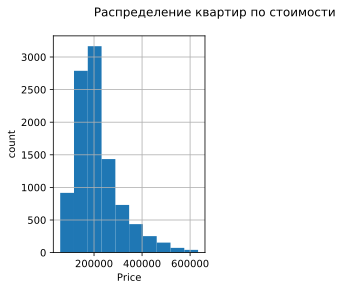

In [1074]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 6, 4

plt.subplot(121)
df['Price'].hist()
plt.ylabel('count')
plt.xlabel('Price')

plt.suptitle('Распределение квартир по стоимости')
plt.show();

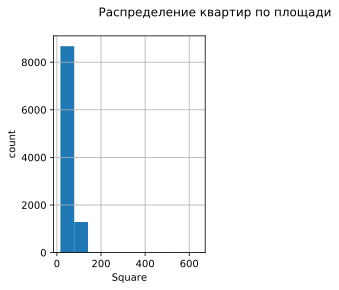

In [1075]:
plt.subplot(121)
df['Square'].hist()
plt.ylabel('count')
plt.xlabel('Square')

plt.suptitle('Распределение квартир по площади')
plt.show();

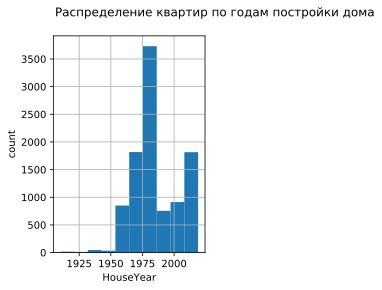

In [1076]:
plt.subplot(121)
df['HouseYear'].hist()
plt.ylabel('count')
plt.xlabel('HouseYear')

plt.suptitle('Распределение квартир по годам постройки дома')
plt.show();

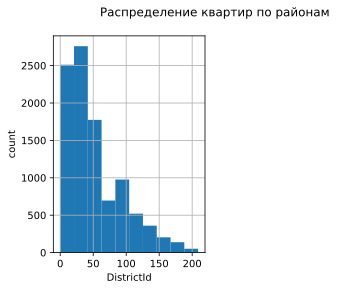

In [1077]:
plt.subplot(121)
df['DistrictId'].hist()
plt.ylabel('count')
plt.xlabel('DistrictId')

plt.suptitle('Распределение квартир по районам')
plt.show();

### Раздел 6. Формирование и регуляризация обучающей и тестовой выборки

In [1078]:
from sklearn.linear_model import LinearRegression

Создаем датафрейм X из данных об объектах недвижимости.


In [1158]:
#X_head = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Healthcare_1', 'Healthcare_2', 'Social_1', 'Social_2', 'Social_3', 'Shops_1']
X_head = ['Rooms', 'Square', 'Social_1', 'DistrictId', 'HouseFloor', 'Ecology_1', 'Healthcare_2', 'Social_2']
X_train = df[X_head]
X_train.describe()

,Rooms,Square,Social_1,DistrictId,HouseFloor,Ecology_1,Healthcare_2,Social_2
count,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,1.892492,56.527971,24.698699,50.427528,13.435536,0.118878,1.320020,5354.444344
std,0.837750,21.518005,17.531035,43.598932,6.088890,0.119051,1.493601,4006.317960
min,1.000000,15.988889,0.000000,0.000000,1.000000,0.000000,0.000000,168.000000
25%,1.000000,41.881974,6.000000,20.000000,9.000000,0.017647,0.000000,1564.000000
50%,2.000000,52.665690,25.000000,36.000000,14.000000,0.075424,1.000000,5285.000000
75%,2.000000,66.007761,36.000000,75.000000,17.000000,0.195781,2.000000,7227.000000
max,19.000000,641.065193,74.000000,209.000000,117.000000,0.521867,6.000000,19083.000000


In [1157]:
Y_head = ['Price']
Y_train = df[Y_head]
Y_train.describe()

,Price
count,9990.000000
mean,214084.831225
std,92792.034865
min,59174.778028
25%,153887.002294
50%,192269.644879
75%,249109.948055
max,633233.466570


Разобъем обучающую выборку из 10 тысяч записей на две части - обучающую и предтестовую, чтобы самостоятельно поэксприментировать с качеством прогнозов на тестовых данных с наличием цен (в финальной тестовой выборке цен на недвижимость нет) 

In [1160]:
from sklearn.model_selection import train_test_split

X_train0, X_test0, Y_train0, Y_test0 = train_test_split(df[X_head], df[Y_head], test_size = 2490)

In [1161]:
X_train0.describe()

,Rooms,Square,Social_1,DistrictId,HouseFloor,Ecology_1,Healthcare_2,Social_2
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,1.890267,56.494203,24.740533,50.365600,13.452933,0.119280,1.313333,5369.579200
std,0.843437,22.218162,17.605533,43.499419,6.008621,0.119252,1.496837,4034.665859
min,1.000000,15.988889,0.000000,0.000000,1.000000,0.000000,0.000000,168.000000
25%,1.000000,41.855359,6.000000,20.000000,9.000000,0.019509,0.000000,1564.000000
50%,2.000000,52.648138,25.000000,36.000000,14.000000,0.075601,1.000000,5285.000000
75%,2.000000,65.939940,36.000000,75.000000,17.000000,0.195781,2.000000,7227.000000
max,19.000000,641.065193,74.000000,208.000000,99.000000,0.521867,6.000000,19083.000000


In [1162]:
Y_train0.describe()

,Price
count,7500.000000
mean,213746.590330
std,92242.788603
min,59877.592523
25%,153820.176034
50%,192317.918512
75%,249926.275650
max,627525.072788


In [1163]:
X_test0.describe()

,Rooms,Square,Social_1,DistrictId,HouseFloor,Ecology_1,Healthcare_2,Social_2
count,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.00000
mean,1.899197,56.629680,24.572691,50.614056,13.383133,0.117666,1.340161,5308.85743
std,0.820513,19.259715,17.307599,43.905557,6.325460,0.118457,1.483928,3920.13997
min,1.000000,16.698571,0.000000,0.000000,1.000000,0.000000,0.000000,168.00000
25%,1.000000,41.929486,6.000000,20.000000,9.000000,0.017647,0.000000,1564.00000
50%,2.000000,52.707656,25.000000,35.500000,14.000000,0.072158,1.000000,5285.00000
75%,2.000000,66.324695,35.000000,76.000000,17.000000,0.195781,2.000000,7287.00000
max,10.000000,186.692602,74.000000,209.000000,117.000000,0.521867,6.000000,19083.00000


In [1164]:
Y_test0.describe()

,Price
count,2490.000000
mean,215103.629103
std,94438.517891
min,59174.778028
25%,154630.723818
50%,192098.321737
75%,247821.542414
max,633233.466570


In [1159]:
X_test = dt[X_head]
X_test.describe()

,Rooms,Square,Social_1,DistrictId,HouseFloor,Ecology_1,Healthcare_2,Social_2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,1.910800,56.591223,24.933800,51.279200,13.395000,0.119874,1.31940,5406.900000
std,0.837725,19.407324,17.532202,44.179466,6.231945,0.120070,1.47994,4026.614773
min,1.000000,1.378543,0.000000,0.000000,1.000000,0.000000,0.00000,168.000000
25%,1.000000,41.989020,6.000000,21.000000,9.000000,0.019509,0.00000,1564.000000
50%,2.000000,52.933734,25.000000,37.000000,14.000000,0.072158,1.00000,5285.000000
75%,2.000000,66.416189,36.000000,77.000000,17.000000,0.195781,2.00000,7287.000000
max,17.000000,303.071094,74.000000,212.000000,99.000000,0.521867,6.00000,19083.000000


Вес признаков до стандартизации

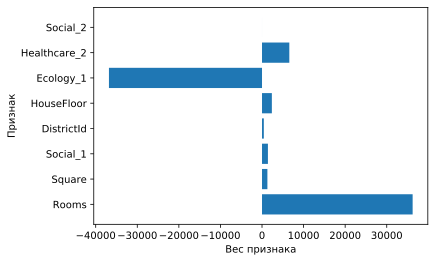

In [1137]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 6, 4

lr.fit(X_train, Y_train)

plt.barh(X_head, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

Стандартизируем признаки в обучающей и тестовой выборке

In [1138]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [1139]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_head)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_head)

In [1165]:
X_train0_scaled = scaler.fit_transform(X_train0)
X_train0_scaled = pd.DataFrame(X_train0_scaled, columns = X_head)

X_test0_scaled = scaler.fit_transform(X_test0)
X_test0_scaled = pd.DataFrame(X_test0_scaled, columns = X_head)

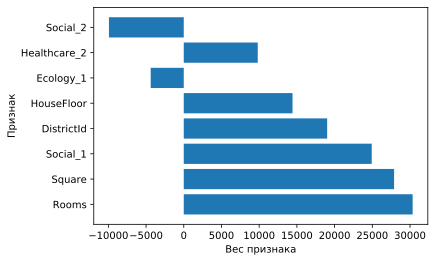

In [1140]:
lr.fit(X_train_scaled, Y_train)

plt.barh(X_head, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

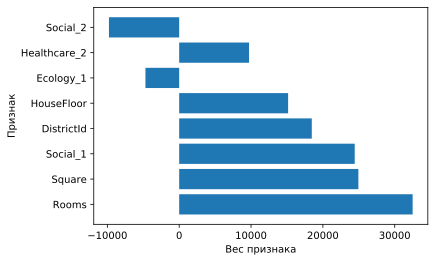

In [1172]:
lr.fit(X_train0_scaled, Y_train0)

plt.barh(X_head, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

Обучение методом линейной регрессии

In [1141]:
dt['Id'].head()

0      725
1    15856
2     5480
3    15664
4    14275
Name: Id, dtype: int64

In [1169]:
X_train_scaled.describe()

,Rooms,Square,Social_1,DistrictId,HouseFloor,Ecology_1,Healthcare_2,Social_2
count,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03
mean,4.591145e-16,3.794096e-17,-1.263031e-17,-6.414622e-17,2.294016e-16,1.240583e-16,-1.158333e-15,2.109313e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.065398e+00,-1.884055e+00,-1.408926e+00,-1.156681e+00,-2.042434e+00,-9.985980e-01,-8.838279e-01,-1.294631e+00
25%,-1.065398e+00,-6.806732e-01,-1.066659e+00,-6.979311e-01,-7.285002e-01,-8.503591e-01,-8.838279e-01,-9.461641e-01
50%,1.283352e-01,-1.794996e-01,1.718760e-02,-3.309313e-01,9.270864e-02,-3.650236e-01,-2.142715e-01,-1.733458e-02
75%,1.283352e-01,4.405736e-01,6.446777e-01,5.636308e-01,5.854339e-01,6.460029e-01,4.552850e-01,4.674241e-01
max,2.042179e+01,2.716639e+01,2.812371e+00,3.637254e+00,1.700961e+01,3.385192e+00,3.133511e+00,3.426898e+00


In [1171]:
X_train0_scaled.describe()

,Rooms,Square,Social_1,DistrictId,HouseFloor,Ecology_1,Healthcare_2,Social_2
count,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03
mean,-1.424046e-16,-3.453534e-17,-6.822691e-17,-1.567931e-16,-1.196302e-16,-8.550198e-17,-2.808124e-17,-2.018237e-16
std,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00
min,-1.055592e+00,-1.823194e+00,-1.405364e+00,-1.157923e+00,-2.072649e+00,-1.000298e+00,-8.774642e-01,-1.289308e+00
25%,-1.055592e+00,-6.589123e-01,-1.064539e+00,-6.981156e-01,-7.411401e-01,-8.366945e-01,-8.774642e-01,-9.432833e-01
50%,1.301112e-01,-1.731161e-01,1.473877e-02,-3.302701e-01,9.105302e-02,-3.662961e-01,-2.093443e-01,-2.096452e-02
75%,1.301112e-01,4.251642e-01,6.395840e-01,5.663534e-01,5.903689e-01,6.415478e-01,4.587757e-01,4.603962e-01
max,2.028707e+01,2.631226e+01,2.798140e+00,3.624069e+00,1.423834e+01,3.376148e+00,3.131256e+00,3.399125e+00


In [1190]:
X_test.describe()

,Rooms,Square,Social_1,DistrictId,HouseFloor,Ecology_1,Healthcare_2,Social_2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,1.910800,56.591223,24.933800,51.279200,13.395000,0.119874,1.31940,5406.900000
std,0.837725,19.407324,17.532202,44.179466,6.231945,0.120070,1.47994,4026.614773
min,1.000000,1.378543,0.000000,0.000000,1.000000,0.000000,0.00000,168.000000
25%,1.000000,41.989020,6.000000,21.000000,9.000000,0.019509,0.00000,1564.000000
50%,2.000000,52.933734,25.000000,37.000000,14.000000,0.072158,1.00000,5285.000000
75%,2.000000,66.416189,36.000000,77.000000,17.000000,0.195781,2.00000,7287.000000
max,17.000000,303.071094,74.000000,212.000000,99.000000,0.521867,6.00000,19083.000000


In [1192]:
X_train0.describe()

,Rooms,Square,Social_1,DistrictId,HouseFloor,Ecology_1,Healthcare_2,Social_2
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,1.890267,56.494203,24.740533,50.365600,13.452933,0.119280,1.313333,5369.579200
std,0.843437,22.218162,17.605533,43.499419,6.008621,0.119252,1.496837,4034.665859
min,1.000000,15.988889,0.000000,0.000000,1.000000,0.000000,0.000000,168.000000
25%,1.000000,41.855359,6.000000,20.000000,9.000000,0.019509,0.000000,1564.000000
50%,2.000000,52.648138,25.000000,36.000000,14.000000,0.075601,1.000000,5285.000000
75%,2.000000,65.939940,36.000000,75.000000,17.000000,0.195781,2.000000,7227.000000
max,19.000000,641.065193,74.000000,208.000000,99.000000,0.521867,6.000000,19083.000000


In [1201]:
X_train0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 6042 to 1583
Data columns (total 8 columns):
Rooms           7500 non-null int64
Square          7500 non-null float64
Social_1        7500 non-null int64
DistrictId      7500 non-null int64
HouseFloor      7500 non-null int64
Ecology_1       7500 non-null float64
Healthcare_2    7500 non-null int64
Social_2        7500 non-null int64
dtypes: float64(2), int64(6)
memory usage: 527.3 KB


In [1191]:
X_test0.describe()

,Rooms,Square,Social_1,DistrictId,HouseFloor,Ecology_1,Healthcare_2,Social_2
count,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.00000
mean,1.899197,56.629680,24.572691,50.614056,13.383133,0.117666,1.340161,5308.85743
std,0.820513,19.259715,17.307599,43.905557,6.325460,0.118457,1.483928,3920.13997
min,1.000000,16.698571,0.000000,0.000000,1.000000,0.000000,0.000000,168.00000
25%,1.000000,41.929486,6.000000,20.000000,9.000000,0.017647,0.000000,1564.00000
50%,2.000000,52.707656,25.000000,35.500000,14.000000,0.072158,1.000000,5285.00000
75%,2.000000,66.324695,35.000000,76.000000,17.000000,0.195781,2.000000,7287.00000
max,10.000000,186.692602,74.000000,209.000000,117.000000,0.521867,6.000000,19083.00000


In [1186]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

lr = LinearRegression()
lr.fit(X_train0_scaled, Y_train0.astype(int))
Y_pred0 = lr.predict(X_test0_scaled).astype(int)
Y_pred0.shape

PRED_DATASET_LINEAR = 'pred0_linear.csv'
prediction = pd.DataFrame(Y_pred0, columns = Y_head)
# prediction.index.names = ['Id']
prediction['Id']= dt['Id']
prediction.to_csv(PRED_DATASET_LINEAR, index = False, columns = ['Id','Price'])


In [1202]:
lr.fit(X_train0_scaled, Y_train0)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1203]:
Y_pred0 = lr.predict(X_test0_scaled)

In [1204]:
Y_pred0.shape

(2490, 1)

In [1205]:
check_test = pd.DataFrame({
    "Y_test0": Y_test0["Price"],
    "Y_pred0": Y_pred0.flatten(),
})

check_test.head(10)

,Y_test0,Y_pred0
2558,182452.764759,347133.482391
6122,173324.664281,223447.208138
9451,249400.979172,224624.641334
9137,242525.465383,231724.555302
5762,190663.084907,178069.425714
2106,150040.805118,157528.289069
7903,196538.381306,321689.930620
9620,169333.533356,173150.981359
6196,167850.178678,160224.260295
8956,149934.926084,221572.281099


In [1206]:
check_test["Error"] = check_test["Y_pred0"] - check_test["Y_test0"]

check_test.head()

,Y_test0,Y_pred0,Error
2558,182452.764759,347133.482391,164680.717631
6122,173324.664281,223447.208138,50122.543857
9451,249400.979172,224624.641334,-24776.337838
9137,242525.465383,231724.555302,-10800.910081
5762,190663.084907,178069.425714,-12593.659193


In [1207]:
mse1 = (check_test["Error"] ** 2).mean()

mse1

4327954837.627275

In [1208]:
from sklearn.metrics import mean_squared_error

mean_squared_error(check_test["Y_pred0"], check_test["Y_test0"])

4327954837.6272745

In [1199]:
(np.abs(check_test["Error"])).mean()

45451.52409638554

In [1200]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(check_test["Y_pred0"], check_test["Y_test0"])

45451.52409638554

In [1188]:
accuracy_score(check_test['Y_test0'], check_test['Y_pred0'])

0.0

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, Y_train.astype(int))
Y_pred = lr.predict(X_test_scaled).astype(int)
Y_pred.shape

PRED_DATASET_LINEAR = 'pred_linear.csv'
prediction = pd.DataFrame(Y_pred, columns = Y_head)
# prediction.index.names = ['Id']
prediction['Id']= dt['Id']
prediction.to_csv(PRED_DATASET_LINEAR, index = False, columns = ['Id','Price'])

# accuracy_score(Y_test, Y_pred)

In [1145]:
prediction.head()

,Price,Id
0,183013,725
1,203916,15856
2,193689,5480
3,270119,15664
4,138111,14275


Обучение методом деревьев принятия решений

In [1146]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 7)
clf.fit(X_train_scaled, Y_train.astype(int))
Y_pred = clf.predict(X_test_scaled)
Y_pred.shape

PRED_DATASET_DECISION_TREE = 'pred_decision_tree.csv'
prediction = pd.DataFrame(Y_pred, columns=Y_head)
prediction.index.names = ['LineNo']
prediction['Id']= dt['Id']
prediction.to_csv(PRED_DATASET_DECISION_TREE, index = False, columns = ['Id','Price'])

# accuracy_score(Y_test, Y_pred)



In [1147]:
prediction.head()

,Price,Id
LineNo,,
0,227510,725
1,83511,15856
2,76470,5480
3,227510,15664
4,69578,14275


Обучение методом Random Forest

Рассмотрим несколько параметров данной модели:

* `n_estimators` - число деревьев в ансамбле
* `max_features` - максимальное число признаков, которое может быть использовано при построении каждого дерева
* `max_depth` - максимальная глубина дерева

Для того, чтобы выбрать подходящий набор параметров, можно использовать _Grid search_ или поиск по сетке. Этот метод используется для того, чтобы перебрать все возможные комбинации параметров и выбрать ту комбинацию, которая максимизирует выбранную нами метрику. Можно воспользоваться готовой реализацией из библиотеки `sklearn`.

In [1151]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(max_depth=5, max_features=5, n_estimators=120)
clf.fit(X_train_scaled, Y_train.astype(int))
Y_pred = clf.predict(X_test_scaled)
Y_pred.shape

PRED_DATASET_RANDOM_FOREST = 'pred_random_forest.csv'
prediction = pd.DataFrame(Y_pred, columns=Y_head)
# prediction.index.names = ['Id']
prediction['Id']= dt['Id']
prediction.to_csv(PRED_DATASET_RANDOM_FOREST, index = False, columns = ['Id','Price'])

#accuracy_score(Y_test, Y_pred)

In [1149]:
prediction.head()

,Price,Id
0,199345,725
1,199345,15856
2,78388,5480
3,199345,15664
4,199345,14275


In [1150]:
test = pd.read_csv(PRED_DATASET_LINEAR).astype(int)
test.rename(columns = {'Price':'Price Linear'}, inplace = True)
test['Price DecisionTree'] = pd.read_csv(PRED_DATASET_DECISION_TREE)['Price']
test['Price RandomForest'] = pd.read_csv(PRED_DATASET_RANDOM_FOREST)['Price']
test.head(10)


,Id,Price Linear,Price DecisionTree,Price RandomForest
0,725,183013,227510,199345
1,15856,203916,83511,199345
2,5480,193689,76470,78388
3,15664,270119,227510,199345
4,14275,138111,69578,199345
5,7633,184095,138357,199345
6,13329,205750,83511,199345
7,5502,232575,186646,199345
8,4220,320975,76652,312582
9,11538,244234,83511,199345


In [1095]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV

#parameters = {
#    'n_estimators': [150, 200, 250],
#    'max_features': np.arange(5, 9),
#    'max_depth': np.arange(5, 10),
#}

#clf = GridSearchCV(
#    estimator=RandomForestClassifier(),
#    param_grid=parameters,
#    scoring='accuracy',
#    cv=5,
#)

#clf.fit(X_train_scaled, Y_train.astype(int))


### Раздел 7. Выводы результатов